**Credit Default Project**

Gotta first learn what a credit default is 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [2]:
df = pd.read_csv('SEC_EDGAR.csv')

C:\Users\adenm\AppData\Local\Temp\ipykernel_22956\1590958512.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SEC_EDGAR.csv')


In [3]:
df.head(5)

,Unnamed: 0,commonstocksharesissued,assetscurrent,accountspayablecurrent,commonstockvalue,liabilities,liabilitiesandstockholdersequity,stockholdersequity,earningspersharebasic,netincomeloss,...,officerscompensation,intangibleassetscurrent,salariesandwages,interestanddebtexpense,convertibledebt,assetmanagementcosts,accountsreceivablegross,directoperatingcosts,operatingcycle,stock
0,0,NaN,3.181000e+09,1.455000e+09,2000000.0,9.044000e+09,1.674100e+10,5.654000e+09,0.61,113000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA$
1,1,NaN,3.181000e+09,1.455000e+09,2000000.0,9.044000e+09,1.674100e+10,5.654000e+09,0.41,75000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA$
2,2,NaN,3.181000e+09,1.455000e+09,2000000.0,9.044000e+09,1.674100e+10,5.654000e+09,-1.15,-210000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA$
3,3,182930995.0,3.181000e+09,1.455000e+09,2000000.0,9.044000e+09,1.674100e+10,5.654000e+09,-1.15,-400000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA$
4,4,182471195.0,2.566000e+09,1.379000e+09,2000000.0,4.900000e+09,1.641300e+10,9.442000e+09,-1.15,-6000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AA$


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101787 entries, 0 to 101786
Data columns (total 45 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        101787 non-null  int64  
 1   commonstocksharesissued           93171 non-null   float64
 2   assetscurrent                     77232 non-null   float64
 3   accountspayablecurrent            65972 non-null   float64
 4   commonstockvalue                  90450 non-null   float64
 5   liabilities                       82421 non-null   float64
 6   liabilitiesandstockholdersequity  101368 non-null  float64
 7   stockholdersequity                96902 non-null   float64
 8   earningspersharebasic             91441 non-null   float64
 9   netincomeloss                     97053 non-null   float64
 10  profitloss                        58173 non-null   float64
 11  costofgoodssold                   30120 non-null   f

In [8]:
df.isnull().sum()

Unnamed: 0                               0
commonstocksharesissued               8616
assetscurrent                        24555
accountspayablecurrent               35815
commonstockvalue                     11337
liabilities                          19366
liabilitiesandstockholdersequity       419
stockholdersequity                    4885
earningspersharebasic                10346
netincomeloss                         4734
profitloss                           43614
costofgoodssold                      71667
filing_date                              0
costsandexpenses                     71771
cash                                 81223
notespayable                         87412
preferredstockvalue                  85167
depreciation                         36740
operatingexpenses                    51869
revenues                             35561
land                                 79959
accountsreceivablenet                87788
deferredrevenue                      82103
grossprofit

In [9]:
newdf = df.dropna()

In [10]:
len(newdf.index)

0

**This data is wild, let's use some Credit Card Payment data instead**

In [13]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Default payment next month is our target value, with 1 = yes, and 0 = no. Also, the BAL is in New Taiwanese currency, and Sex: 1 = Male, 2 = Female.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [15]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

<Axes: xlabel='LIMIT_BAL'>

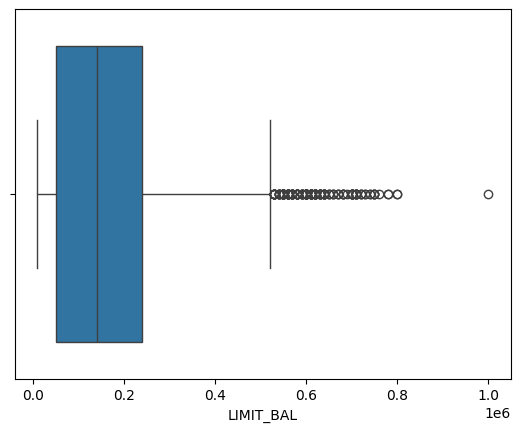

In [18]:
sns.boxplot(x = df['LIMIT_BAL'])

Outlier, so we will drop. 

In [19]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: xlabel='LIMIT_BAL'>

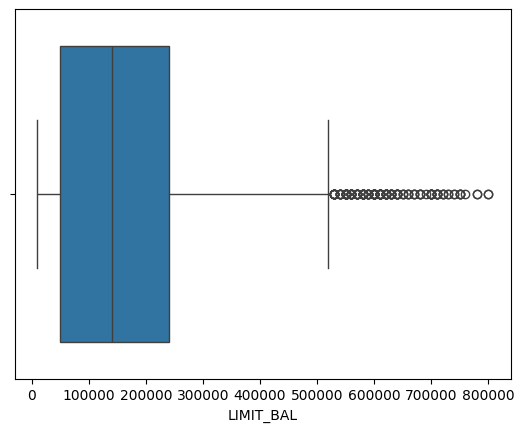

In [21]:
df = df[df['LIMIT_BAL'] < 900000]
sns.boxplot(x = df['LIMIT_BAL'])